**Income Dataset**

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('income.csv')

print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = pd.get_dummies(X)
if y.dtype == 'O':
    y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default accuracy with 10 trees: {default_score:.4f}")


   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  
Default accuracy with 10 trees: 0.8182


Best accuracy: 0.8340 using 73 estimators


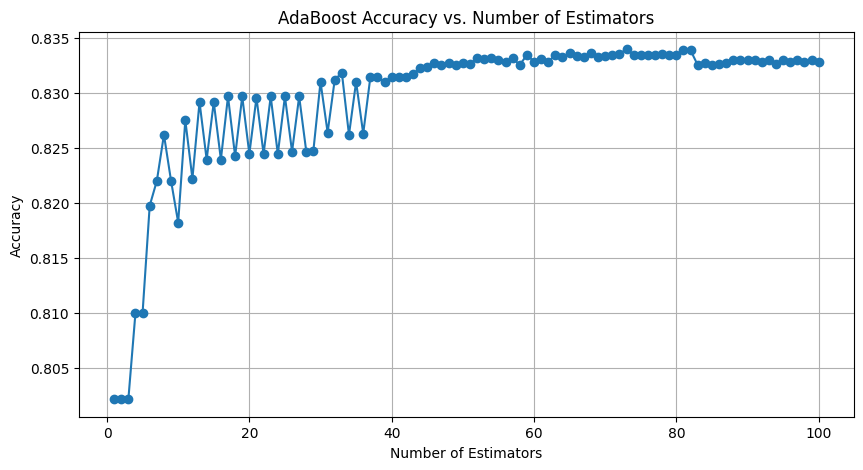

In [4]:
scores = []
n_range = range(1, 101)

for n in n_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

best_score = max(scores)
best_n = n_range[scores.index(best_score)]
print(f"Best accuracy: {best_score:.4f} using {best_n} estimators")

plt.figure(figsize=(10, 5))
plt.plot(n_range, scores, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.grid(True)
plt.show()